In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#the dataset contains bike renters on an hourly basis
bikesharing_data = pd.read_csv('bike_sharing_hourly.csv', index_col = 0)
bikesharing_data.head(10)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8


In [4]:
#we'll focus most of our attention on two columns, temperature and humidity on an hourly basis
#all values have been scaled to be in the range 0 to 1
bikesharing_data[['temp', 'hum']].describe()

,temp,hum
count,17379.000000,17379.000000
mean,0.496987,0.627229
std,0.192556,0.192930
min,0.020000,0.000000
25%,0.340000,0.480000
50%,0.500000,0.630000
75%,0.660000,0.780000
max,1.000000,1.000000


In [5]:
#verifying if there is any correlation between temp and hum
#a correlation matrix shows a slight negative correlation; not really significant
bikesharing_data[['temp', 'hum']].corr()

,temp,hum
temp,1.000000,-0.069881
hum,-0.069881,1.000000


In [6]:
#it's quite logical to assume that the temperature right now is correlated
#with the temperature two hours ago
#two time periods corresponds to two hours
bikesharing_data['temp'].autocorr(lag = 2)

0.980684914901323

In [7]:
#what about temperatures over a period of 12 hours?
bikesharing_data['temp'].autocorr(lag = 12)

0.8250709628213121

In [8]:
#as we increase the number of time periods in our autocorrelation calculation,
#we'll find that the autocorrelation value drops
bikesharing_data['temp'].autocorr(lag = 102)

0.7658269022298079

In [9]:
#we can perform these same calculations for humidity
#the result is positive correlation but not really that much
#we know intuitively that humidity changes considerably over the course of a day
bikesharing_data['hum'].autocorr(lag = 12)

0.20088188422738348

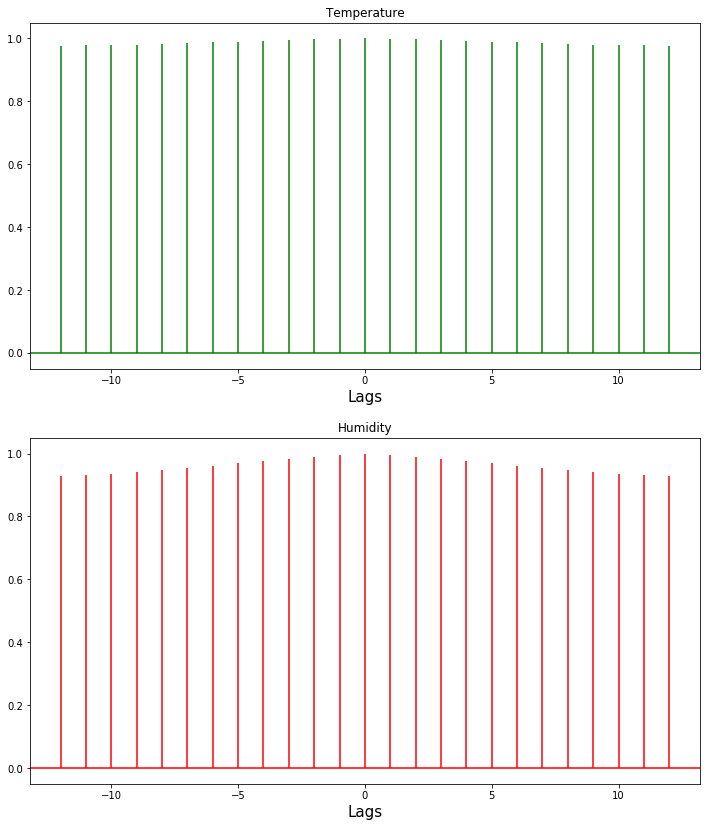

In [11]:
#let's visualize this autocorrelation relationship using
#side-by-side plots in Matplotlib, we're going to set up two plots here using plt.subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 14))

#we'll have two rows and one column plotting the plots one on top of the other
#the first will calculate the autocorrelation on the temperature field with a maximum of 12 lags
#this will calculate autocorrelation for lag 1, lag 2, lag3, ..., lag 12 
ax1.acorr(bikesharing_data['temp'],
         maxlags = 12, color = 'green')
ax1.title.set_text('Temperature')
ax1.set_xlabel('Lags', fontsize = 15)

#the second will calculate the autocorrelation on the humidity with a maxlags of 12 once again,
ax2.acorr(bikesharing_data['hum'],
         maxlags = 12, color = 'red')
ax2.title.set_text('Humidity')
ax2.set_xlabel('Lags', fontsize = 15)

plt.show()

In [12]:
bikesharing_data['temp'].autocorr(lag = 24)

0.9148730709671985

In [13]:
bikesharing_data['hum'].autocorr(lag = 24)

0.4948813054393592

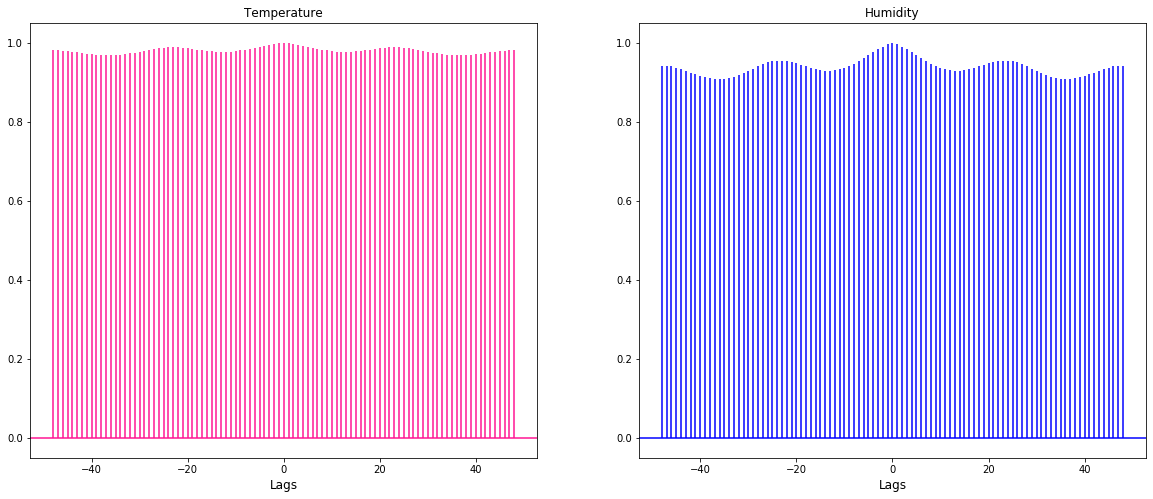

In [15]:
#let's visualize this information using two subplots in Matplotlib
#these plots place side-by-side make the autocorrelations clear
#Temperature is strongly correlated across a single day; humidity less so.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))
 
ax1.acorr(bikesharing_data['temp'],
         maxlags = 48, color = 'deeppink')
ax1.title.set_text('Temperature')
ax1.set_xlabel('Lags', fontsize = 12)

#the second will calculate the autocorrelation on the humidity with a maxlags of 12 once again,
ax2.acorr(bikesharing_data['hum'],
         maxlags = 48, color = 'blue')
ax2.title.set_text('Humidity')
ax2.set_xlabel('Lags', fontsize = 12)

plt.show()